# Local Binary Pattern을 활용한 Face Recognition
---

### Dataset Description:
- 그레이 스케일 face 이미지 17장 + Non-face 이미지 1장 총 18장으로 구성
- 각 이미지의 사이즈는 195 × 231

- apple1_gray.jpg, 
  subject01.centerlight.jpg, subject01.happy.jpg, subject01.normal.jpg,
  subject02.normal.jpg, subject03.normal.jpg, subject07.centerlight.jpg, subject07.happy.jpg, subject07.normal.jpg, subject10.normal.jpg, subject11.centerlight.jpg, subject11.happy.jpg, subject11.normal.jpg, subject12.normal.jpg, subject14.happy.jpg, subject14.normal.jpg, subject14.sad.jpg, subject15.normal.jpg

### 데이터셋 준비
- https://docs.google.com/uc?export=download&id=1sWf596Yy4GkBxPA9VEiETPXPU3eYfs3H
- 위 주소로 압축 파일 다운로드 후 압축 해제

In [1]:
# 파이썬 라이브러리 import
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import cv2

In [2]:
# 주어진 영상을 읽기
dataset_dir  = os.listdir('./image')
dataset_dir = [img for img in dataset_dir if img.endswith(".jpg")]
dataset_dir = sorted(dataset_dir)

width  = 195
height = 231

All Images:
All tensor shape :  (18, 231, 195)


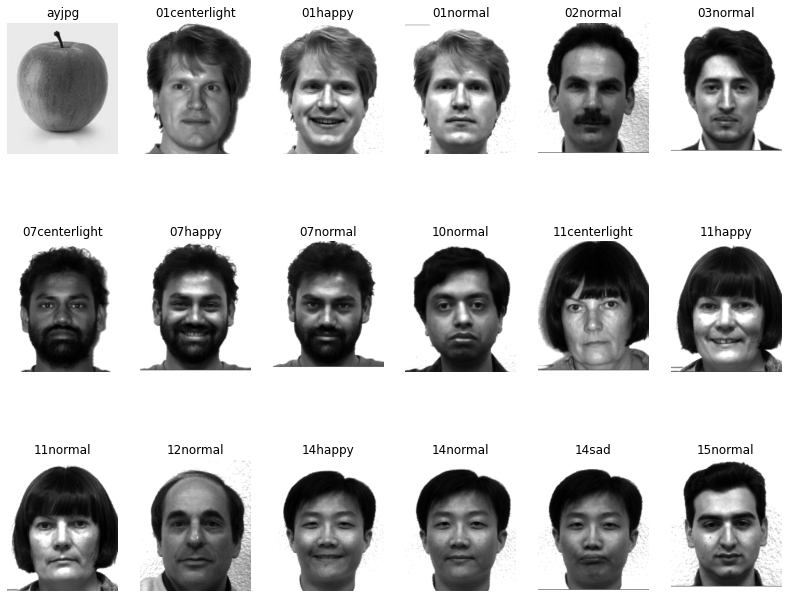

In [3]:
# Dataset 이미지 불러오기
print('All Images:')
image_names = dataset_dir
tensor = np.ndarray(shape=(len(image_names), height, width), dtype=np.float64)
print('All tensor shape : ', tensor.shape)

plt.figure(figsize=(10, 8))
for i in range(len(image_names)):
    img = plt.imread(image_names[i])
    tensor[i] = np.array(img, dtype='float64')
    plt.subplot(3, 6, 1+i)
    plt.title(image_names[i].split('.')[0][-2:]+image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')
plt.show()

In [4]:
# 입력 row, col 위치의 pixel과 center pixel을 비교해 크거나 같으면 1, 아니면 0 반환
def get_pixel(img, center, row, col):
  new_value = 0
  if img[row][col] >= center: 
    new_value = 1
  
  return new_value

In [5]:
'''
64      128     1
32      0       2
16      8       4
'''
# 위에서 작성한 get_pixel에서 얻은 상대적인 밝기에 대한 정보에 중앙을 제외하고
# 우측 상단부터 ''시계'' 방향으로 [1, 2, 4, 8, 16, 32, 64, 128]의 가중치를 적용. (위 3x3 matrix 참조)
def lbp_calculated_pixel(img, row, col):
  pad_img = np.pad(img, (1,1), mode = 'constant', constant_values = 255) # 왼쪽 , 위 픽셀값이 없을 경우 이 값을 채워주기 위해 padding
  center = pad_img[row+1][col+1]
  weight_list = [1,2,4,8,16,32,64,128]
  # image의 padding을 붙혔기 때문에 기준점이 row +1, col +1 이 된다 그렇게 때문에 이를 기준으로 8방향성에 대해 표현
  top_right = get_pixel(pad_img, center, row=row+1-1, col=col+1+1)
  right = get_pixel(pad_img, center, row = row+1, col = col+1+1)
  bottom_right = get_pixel(pad_img, center, row = row+1+1 , col=col+1+1)
  bottom = get_pixel(pad_img, center, row = row+1+1 , col = col+1)
  bottom_left = get_pixel(pad_img, center, row = row+1+1, col = col+1-1)
  left = get_pixel(pad_img, center, row = row+1, col = col+1-1)
  top_left = get_pixel(pad_img, center, row = row+1-1, col = col+1-1)
  top = get_pixel(pad_img, center, row=row+1-1, col = col+1)

  value = sum(np.multiply(weight_list, [top_right, right, bottom_right, bottom, bottom_left, left, top_left, top]))
  # 코드 작성
  # 위에서 작성한  함수 get_pixel 활용

  return value

In [6]:
#위에서 구한 lbp_calculated_pixel함수에서 얻은 값을 [0~255]의 값을 갖도록 히스토그램을 구하기 위한 함수
def calcHistogram(lbp_img, height, width):
  histogram = np.zeros(256, np.int32)
  for i in range(0, height) : 
    for j in range(0, width) :
      histogram[lbp_img[i][j]] += 1


  return histogram

In [7]:
# LBP 이미지, 히스토그램 생성
lbp_img_list = []
lbp_hist_list = []
for n in range(len(image_names)):
    lbp_img = np.zeros((height, width), np.uint8)

    for i in range(0, height):
        for j in range(0, width):
            lbp_img[i, j] = lbp_calculated_pixel(tensor[n], i, j)
    lbp_hist = calcHistogram(lbp_img, height, width)
 #   lbp_hist = cv2.calcHist([lbp_img], [0], None, [256], [0, 256])

    lbp_img_list.append(lbp_img)
    lbp_hist_list.append(lbp_hist)

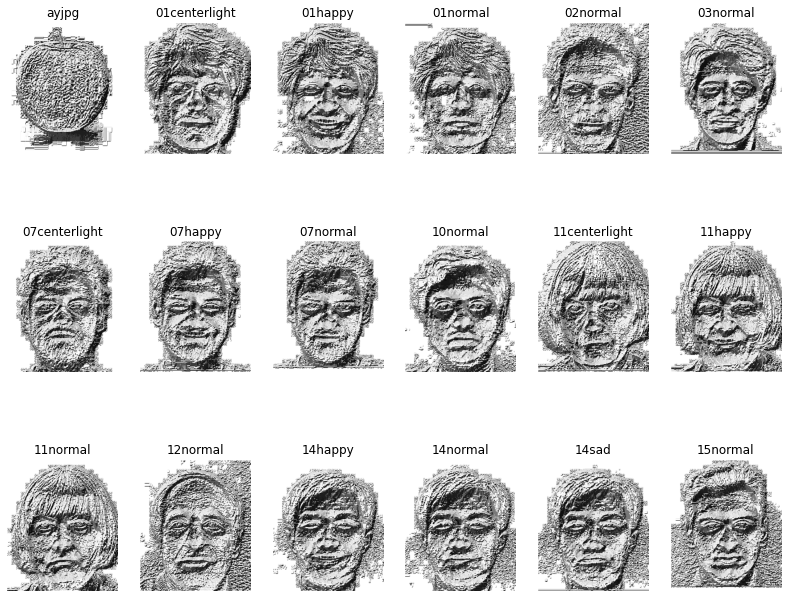

In [8]:
# LBP 이미지 출력
plt.figure(figsize=(10, 8))
for i in range(len(lbp_img_list)):
    plt.subplot(3, 6, 1+i)
    plt.title(image_names[i].split('.')[0][-2:]+image_names[i].split('.')[1])
    plt.imshow(lbp_img_list[i], cmap='gray')
    plt.axis('off')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')
plt.show()

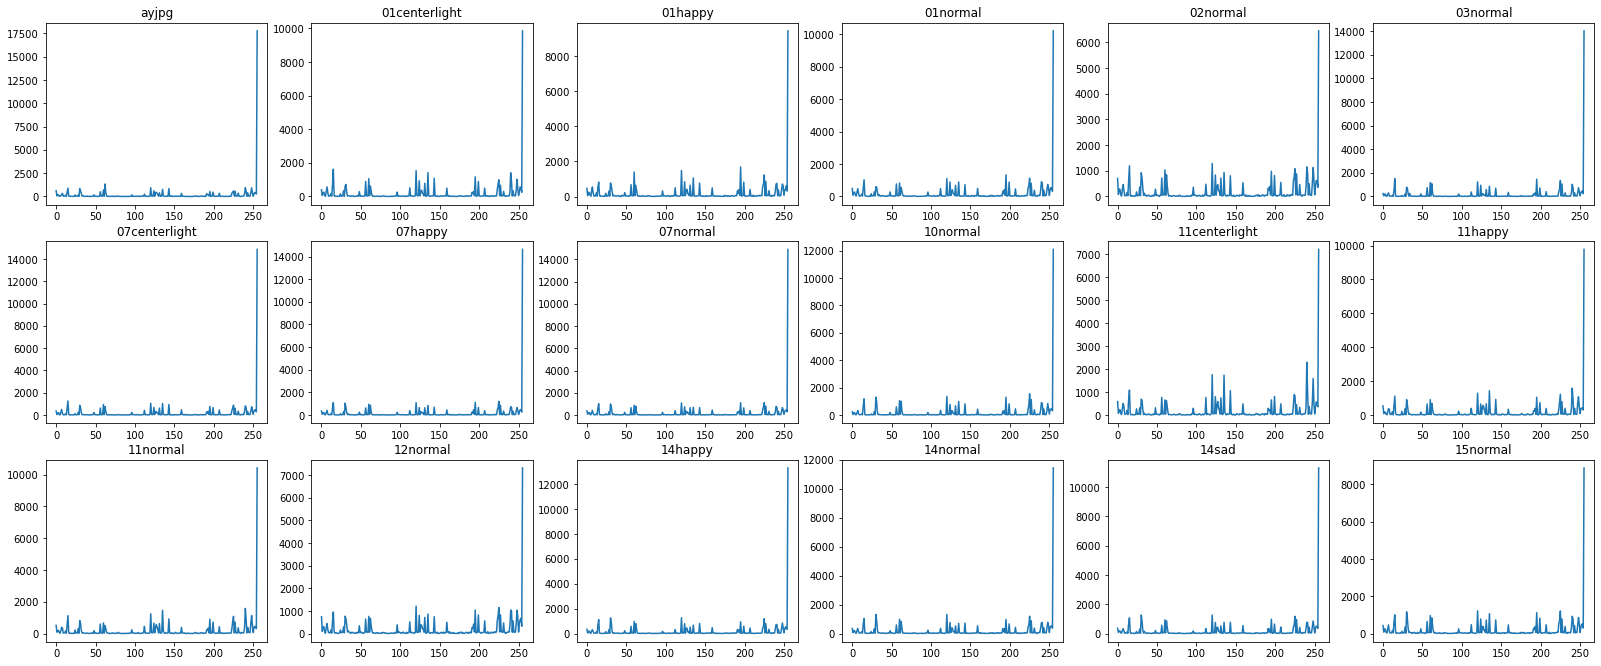

In [9]:
# LBP 히스토그램 출력
plt.figure(figsize=(20, 8))
for i in range(len(lbp_hist_list)):
    plt.subplot(3, 6, 1+i)
    plt.title(image_names[i].split('.')[0][-2:]+image_names[i].split('.')[1])
    plt.plot(lbp_hist_list[i])
    plt.subplots_adjust(right=1.2, top=1.2)
plt.show()